Importing library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Uploding dataset

In [2]:
df = pd.read_csv('ipl2024 Matches.csv') 
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


EDA (Exploratory Data Analysis)

In [3]:
df.shape

(74, 14)

In [4]:
df.dtypes

id                      int64
date                   object
team1                  object
team2                  object
toss_winner            object
decision               object
first_score             int64
first_wkts              int64
second_score            int64
second_wkts             int64
winner                 object
player_of_the_match    object
most_runs              object
most_wkts              object
dtype: object

Dropping irrelevent columns

In [5]:
df = df.drop(columns=['id','date','toss_winner','decision','most_runs','most_wkts','winner'], axis=1)

In [6]:
df.head(5)

,team1,team2,first_score,first_wkts,second_score,second_wkts,player_of_the_match
0,Banglore,Chennai,173,6,176,4,Mustafizur Rahman
1,Delhi,Punjab,174,9,177,6,Sam Curran
2,Kolkata,Hyderabad,208,7,204,7,Andre Russell
3,Rajasthan,Lucknow,193,4,173,6,Sanju Samson
4,Gujarat,Mumbai,168,6,162,9,Sai Sudharsan


Renaming 

In [7]:
df = df.rename(columns={'team1':'TeamA','team2':'TeamB','first_score':'TeamA_score','first_wkts':'TeamA_wkts','second_score':'TeamB_score','second_wkts':'TeamB_wkts'})

In [8]:
df.head(5)

,TeamA,TeamB,TeamA_score,TeamA_wkts,TeamB_score,TeamB_wkts,player_of_the_match
0,Banglore,Chennai,173,6,176,4,Mustafizur Rahman
1,Delhi,Punjab,174,9,177,6,Sam Curran
2,Kolkata,Hyderabad,208,7,204,7,Andre Russell
3,Rajasthan,Lucknow,193,4,173,6,Sanju Samson
4,Gujarat,Mumbai,168,6,162,9,Sai Sudharsan


In [9]:
drop_duplicate = df[df.duplicated()]
drop_duplicate

,TeamA,TeamB,TeamA_score,TeamA_wkts,TeamB_score,TeamB_wkts,player_of_the_match


In [10]:
df.count()

TeamA                  74
TeamB                  74
TeamA_score            74
TeamA_wkts             74
TeamB_score            74
TeamB_wkts             74
player_of_the_match    71
dtype: int64

In [11]:
df = df.drop_duplicates()
df.count()

TeamA                  74
TeamB                  74
TeamA_score            74
TeamA_wkts             74
TeamB_score            74
TeamB_wkts             74
player_of_the_match    71
dtype: int64

Cleaning/Removing/Dropping null values

In [12]:
df.isnull().sum()

TeamA                  0
TeamB                  0
TeamA_score            0
TeamA_wkts             0
TeamB_score            0
TeamB_wkts             0
player_of_the_match    3
dtype: int64

In [13]:
df.dropna() 
df.count()

TeamA                  74
TeamB                  74
TeamA_score            74
TeamA_wkts             74
TeamB_score            74
TeamB_wkts             74
player_of_the_match    71
dtype: int64

Checkink Outliers

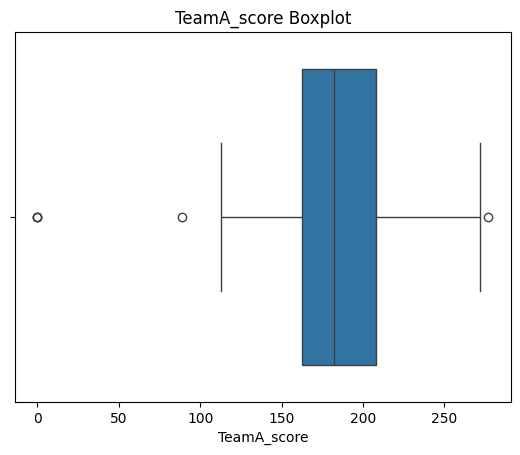

In [14]:
sns.boxplot(x='TeamA_score', data=df) 
plt.title("TeamA_score Boxplot") 
plt.show()

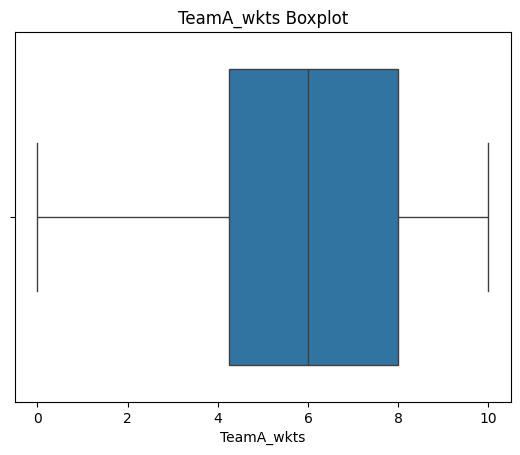

In [15]:
sns.boxplot(x='TeamA_wkts', data=df) 
plt.title("TeamA_wkts Boxplot") 
plt.show()

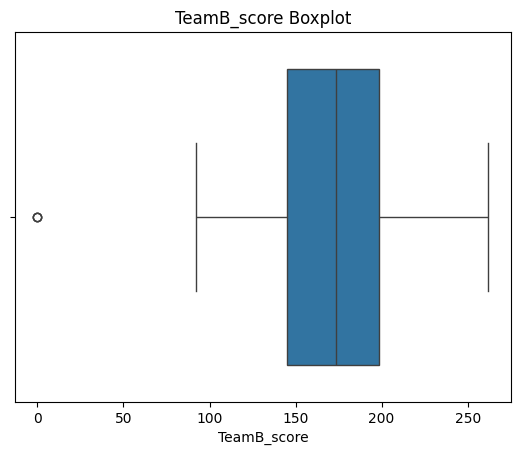

In [16]:
sns.boxplot(x='TeamB_score', data=df) 
plt.title("TeamB_score Boxplot") 
plt.show()

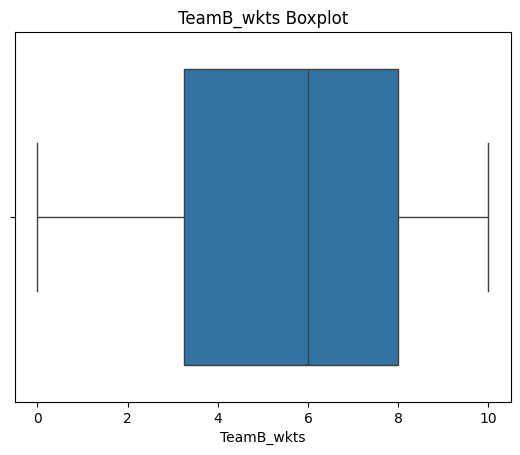

In [17]:
sns.boxplot(x='TeamB_wkts', data=df) 
plt.title("TeamB_wkts Boxplot") 
plt.show()

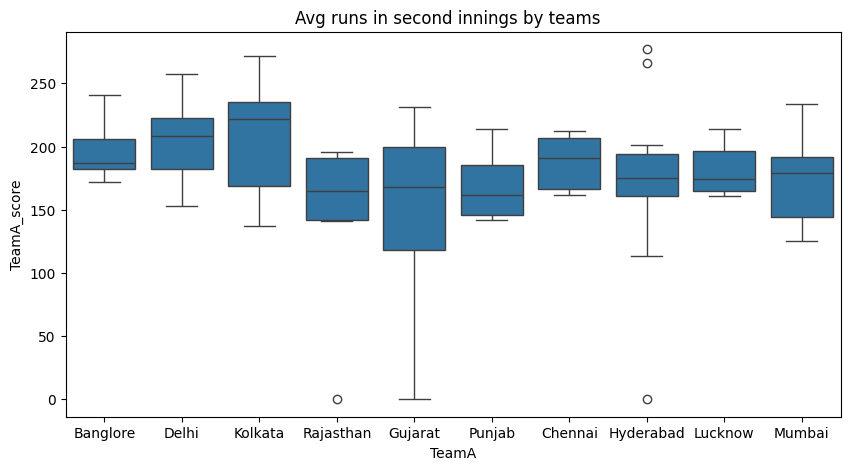

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='TeamA',y='TeamA_score',data=df)
plt.title('Avg runs in second innings by teams  ')
plt.show()

Removing the Outliars

In [19]:
q1 = df.select_dtypes(np.number).quantile(0.25) 
q3 = df.select_dtypes(np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)

TeamA_score    45.75
TeamA_wkts      3.75
TeamB_score    53.00
TeamB_wkts      4.75
dtype: float64


In [20]:
df = df[~((df.select_dtypes(np.number) < (q1 - 1.5 * iqr)) | (df.select_dtypes(np.number) > (q3 + 1.5 * iqr))).any(axis=1)]

In [21]:
q1 = df.select_dtypes( include= np.number).quantile(0.25)
q3 = df.select_dtypes( include= np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)

TeamA_score    43.0
TeamA_wkts      3.0
TeamB_score    47.0
TeamB_wkts      4.0
dtype: float64


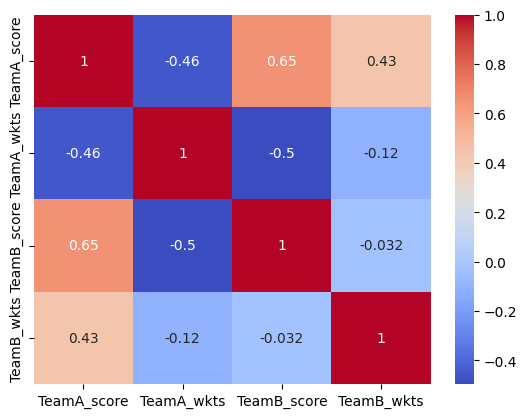

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap( corr,annot=True , cmap='coolwarm')
plt.show()

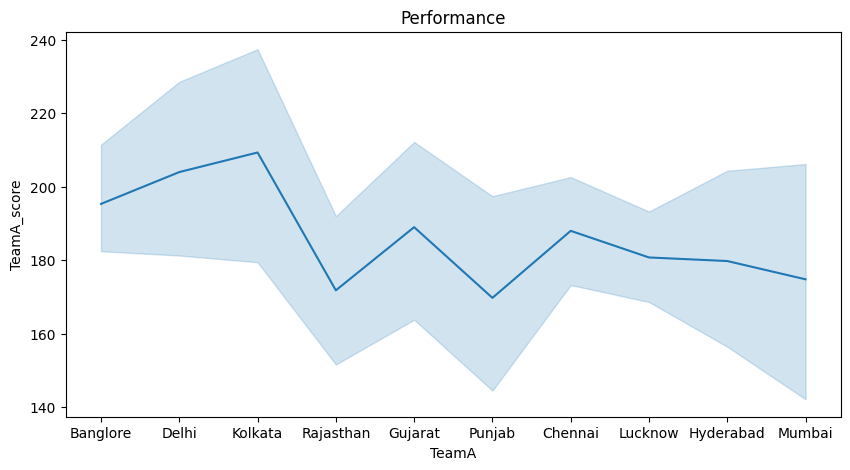

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='TeamA' , y='TeamA_score', data=df )
plt.title("Performance")
plt.show()

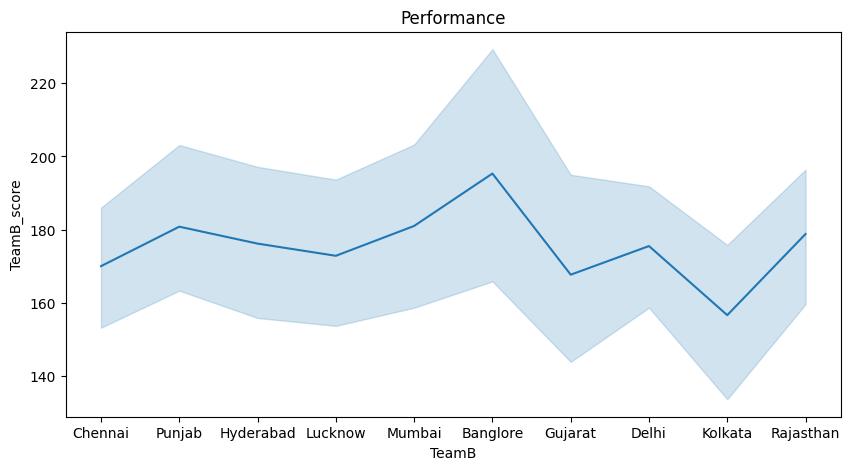

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='TeamB' , y='TeamB_score', data=df )
plt.title("Performance")
plt.show()

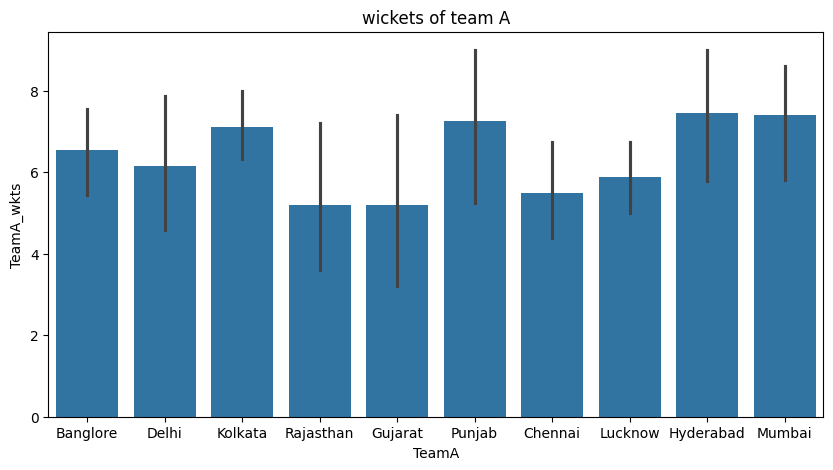

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x='TeamA',y ='TeamA_wkts',data=df)
plt.title('wickets of team A')
plt.show()

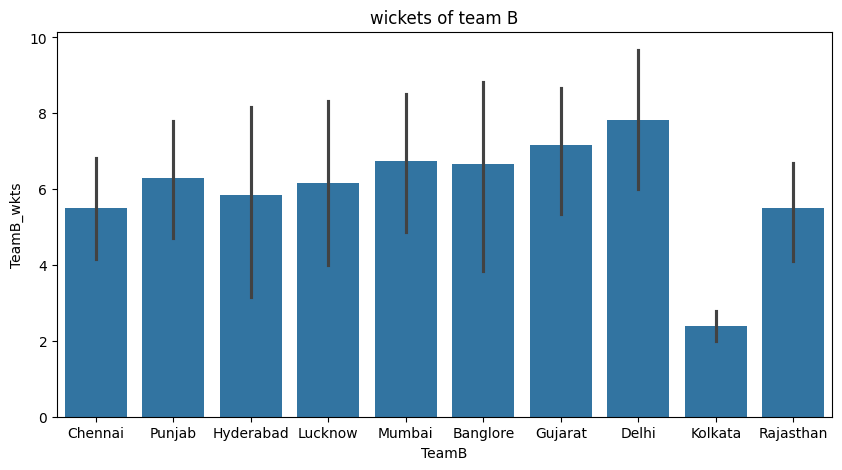

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x='TeamB',y ='TeamB_wkts',data=df)
plt.title('wickets of team B')
plt.show()

PCA(Principal Component Analysis)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Preprocessing

In [31]:
df_numeric = df.select_dtypes(np.number)

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_numeric)
print(x_scaled)


[[-0.46008803 -0.19376351 -0.01327946 -0.75592631]
 [-0.43008228  1.23870242  0.01944493 -0.02643099]
 [ 0.5901129   0.28372513  0.90300352  0.33831667]
 [ 0.14002679 -1.14874079 -0.11145264 -0.02643099]
 [-0.61011673 -0.19376351 -0.47142096  1.06781198]
 [-0.3700708  -0.19376351  0.05216932 -0.02643099]
 [ 0.53010142 -0.19376351 -1.09318441  0.70306433]
 [-0.10001914 -0.67125215 -0.11145264 -0.39117865]
 [-0.19003636 -0.19376351  0.31396446 -1.12067396]
 [ 0.32006123  0.76121378  0.05216932 -0.39117865]
 [-0.79015117  0.76121378 -0.2750746  -1.12067396]
 [ 0.08001531 -0.67125215 -0.17690142 -0.02643099]
 [-1.90036358  1.23870242 -1.61677469 -0.75592631]
 [-0.2200421  -0.67125215 -0.76594049  1.43255964]
 [ 2.51048031  0.28372513 -0.34052339  1.43255964]
 [ 0.32006123 -1.14874079  0.77210595  0.33831667]
 [-0.70013395 -0.67125215 -0.34052339 -0.75592631]
 [-0.16003062 -1.62622943  0.41213764 -0.75592631]
 [ 1.37026216 -0.67125215  0.93572791  0.70306433]
 [-0.76014543 -0.67125215 -1.51

In [35]:
X = df[['TeamA_wkts', 'TeamB_wkts', 'TeamA_score', 'TeamB_score']]
y = df['TeamA']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55, 4)
(14, 4)
(55,)
(14,)


In [40]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)
normalized_X_test

array([[0.03512812, 0.02341875, 0.71036866, 0.70256241],
       [0.02105742, 0.03008203, 0.80018187, 0.5986323 ],
       [0.02401291, 0.02401291, 0.71352646, 0.6998048 ],
       [0.05042907, 0.02241292, 0.70040377, 0.71161023],
       [0.03513588, 0.00390399, 0.69881367, 0.71442962],
       [0.02862808, 0.01073553, 0.70138805, 0.71212358],
       [0.0293574 , 0.01677565, 0.70038358, 0.71296533],
       [0.03044313, 0.01304705, 0.70454097, 0.70888999],
       [0.04021867, 0.03128119, 0.78202968, 0.621155  ],
       [0.02390742, 0.03187656, 0.82082137, 0.56979347],
       [0.01789702, 0.01073821, 0.70156326, 0.71230147],
       [0.04721974, 0.02833185, 0.69413022, 0.71774009],
       [0.00931735, 0.02174049, 0.58078175, 0.81371561],
       [0.01417175, 0.02480056, 0.70504457, 0.7085875 ]])

In [41]:
from sklearn.preprocessing import Binarizer 
Binarizer = Binarizer(threshold=0.0).fit(X)
binary_X = Binarizer.transform(X)
binary_X

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1,

In [43]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(x_scaled)
X_pca

array([[-3.89088689e-01, -7.77872531e-01],
       [-8.83145392e-01,  1.79350358e-01],
       [ 8.04154196e-01,  1.03698609e-01],
       [ 5.96297914e-01, -2.18674358e-01],
       [-2.52984947e-01,  9.66408446e-01],
       [-1.05913275e-01, -1.52912621e-01],
       [ 2.40247954e-03,  1.09493403e+00],
       [ 1.13069687e-01, -4.68282873e-01],
       [-1.39952201e-01, -1.17857451e+00],
       [-2.63218738e-01, -1.30379058e-01],
       [-1.31257674e+00, -8.29150619e-01],
       [ 2.82729292e-01, -9.32050449e-02],
       [-2.87462339e+00, -6.15922493e-02],
       [ 1.59049229e-01,  1.35932614e+00],
       [ 1.57599959e+00,  1.88617582e+00],
       [ 1.28992807e+00, -2.21053652e-01],
       [-4.75170463e-01, -7.99487323e-01],
       [ 7.51226825e-01, -1.22445696e+00],
       [ 1.87541909e+00,  3.24588988e-01],
       [-5.85616613e-01,  1.56448635e+00],
       [-2.49836460e+00, -4.98656892e-01],
       [-6.82673546e-01,  1.82170776e-01],
       [ 1.45787534e+00, -3.33642994e-01],
       [-1.